# Week 1 Assignment: Text Preprocessing

Overview:

This assignment requires applying the concepts of tokenization, stop word removal, and text normalization.

Students will write their own code for the tasks, analyze the results, and respond to exercises based on results.

Submission Requirements   
	•	Code: Submit a single Jupyter Notebook containing all the Python code.    
	•	Analysis: Include written responses to all analytical prompts in markdown cells within the notebook.    
	•	Visualization: Include all required plots and charts in the notebook.   
	•	Filename: Name the file as
			Week1_TextPreprocessing_<YourName>.pdf



In [1]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

# Essential downloads for Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger') # Required for effective Lemmatization

# URL for the SMS Spam Dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"

# Load the dataset
sms_data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Display the first few rows
print("First 5 rows of the SMS Spam Dataset:")
print(sms_data.head())

# Check dataset size
print("\nDataset Size:", sms_data.shape)

# Split dataset into spam and ham categories for exploration
print("\nLabel Distribution:")
print(sms_data['label'].value_counts())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\water\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\water\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\water\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


First 5 rows of the SMS Spam Dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Size: (5572, 2)

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


## Part 1: Tokenization (20 points)


	1.	Task:   
	•	Load the SMS Spam dataset and select the first 50 messages for tokenization.  
	•	Tokensize using
			- NLTK
			- SpaCy
			- Custom Regex based tokenizer
	•	Write a custom Regex that specifically handles SMS-style noise (e.g., emojis or excessive punctuations like '!!!')

	2.	Deliverable (15 points):
	•	Python script that demonstrates tokenization using all three approaches.
	•	A brief written response comparing the outputs and discussing differences (e.g., handling contractions, special characters, and hyphenated words).

	3.	Question (5 points)
	•	How do the tokenization results differ between NLTK, SpaCy, and Regex? Which method would you prefer for preprocessing SMS messages, and why?

Load the SMS Spam dataset and select the first 50 messages for tokenization.

In [3]:
messages_to_tokenize = sms_data["message"].head(50).values
messages_to_tokenize[0:5]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though"],
      dtype=object)

Tokenize using NLTK, SpaCy, Custom Regex based tokenizer.

In [4]:
# Imports
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters
import spacy
import re

### NLTK Tokenization

*Note: The top ten messages have been selected for tokeniziation, but to establish a vocabulary across the entire list of messages, the tokens for each message must be stored. Alternatively, the ten messages can all be appended together and the text block can be tokenized. I have selected word tokenization for this application, as the text corpus is rather small.*

In [5]:
# Method 1:

nltk_tokens_1 = []
for message in messages_to_tokenize:
    nltk_tokens_1.extend(word_tokenize(message))

# Remove duplicates
nltk_tokens_1 = list(nltk_tokens_1)

nltk_tokens_1[0:10]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in']

In [6]:
#Method 2:

message = (" ").join(messages_to_tokenize)
nltk_tokens_2 = word_tokenize(message)

nltk_tokens_2[0:10]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in']

In [7]:
# Check the length of each
print(len(nltk_tokens_1), len(nltk_tokens_2))

1094 1094


The length is the same between the two methods. To ensure each method is functionally the same, let's compare the contents of each token list.

In [8]:
print(set(nltk_tokens_1)-set(nltk_tokens_2))

set()


The unique tokens are equivalent, as the difference between the sets is an empty set. Just as a sanity check, I want to see what the duplicate tokens are in one of the token lists.

In [9]:
dup_tokens = {}
for tok in nltk_tokens_2:
    if tok in dup_tokens:
        dup_tokens[tok]+=1
    else:
        dup_tokens[tok]=1

i=0
for tok, count in dup_tokens.items():
    if count>1:
        print(tok, count)
        i+=1
    
    if i>5:
        break

until 2
, 15
.. 3
only 3
in 7
n 2


A majority of these words are stop words, which will be removed anyway in part 2.

### SpaCy Tokenization

Similar to NLTK, the messages can be processed using two different methods. I will compare the token output of both here as well.

In [10]:
# Instantiate the tokenizer
nlp = spacy.load("en_core_web_sm")

In [11]:
# Method 1

spacy_tokens_1 = []
for message in messages_to_tokenize:
    spacy_tokens_1.extend([token.text for token in nlp(message)])

In [12]:
# Method 2

spacy_message = nlp((" ").join(messages_to_tokenize))
spacy_tokens_2 = [token.text for token in spacy_message]

Now that each token list has been generated, compare them.

In [13]:
print(len(spacy_tokens_1), len(spacy_tokens_2))

1094 1095


In [14]:
print(set(spacy_tokens_1)-set(spacy_tokens_2))

set()


Nice, the lengths are the same and the unique tokens are the same.

### Custom Regex Tokenizer

First, remove all emojis and pictographic text message elements. The unicode values for these characters fall within specific ranges, so they can be easily removed.

In [16]:
emoji_pattern = re.compile(
    "["
    "\\U0001F600-\\U0001F64F"  # emoticons
    "\\U0001F300-\\U0001F5FF"  # symbols & pictographs
    "\\U0001F680-\\U0001F6FF"  # transport & map symbols
    "\\U0001F1E0-\\U0001F1FF"  # flags (iOS)
    "\\U00002702-\\U000027B0"
    "\\U000024C2-\\U0001F251"
    "]+", flags=re.UNICODE
)
cleaned_text = emoji_pattern.sub(r'', "".join(messages_to_tokenize))

Now remove all contractions, hyphens, and punctuation.

In [17]:
regex_tokens = re.findall(r"\b\w+(?:-\w+)*(?:!|'t|n't|'re|'ve|'ll|'d|'s)?\b", cleaned_text)
len(regex_tokens)

911

Verify that contractions and hyphens were included in the set of tokens. First, find the words with contractions and hyphens in the dataset.

In [24]:
#Contractions:
i=0
for word in (" ").join(messages_to_tokenize).split(" "):
    if "'" in word:
        print(word)
        i+=1
    if i==5:
        break

rate)T&C's
08452810075over18's
don't
it's
week's


In [25]:
#Hyphens:

for word in (" ").join(messages_to_tokenize).split(" "):
    if "-" in word:
        print(word)

-
-
-


In [26]:
# Print tokens with apostrophes to compare to contraction list
for token in regex_tokens:
    if "'" in token:
        print(token)

C's
don't
it's
week's
I'd
don't
I've
4403LDNW1A7RW18I've
mom's
we're
I'll
there's
that's
that's
doesn't
won't
I'll
roommate's
How's
you'd
callsDidn't
can't
don't
didn't


In [27]:
# This should be empty, but check anyway
for token in regex_tokens:
    if "-" in token:
        print(token)

### Comparison of Methods

First, take a look at the similar and dissimilar tokens from each of the methods.

In [28]:
same_tokens = set(nltk_tokens_2)&set(spacy_tokens_2)&set(regex_tokens)
print(list(same_tokens)[0:10])
print(f'{len(same_tokens)}')

['3', 'wat', 'lunch', 'For', 'hungry', 'has', 'comin', 'We', 'wanted', 'miss']
464


In [29]:
complete_token_list = set(nltk_tokens_2+spacy_tokens_2+regex_tokens)
len(complete_token_list)

636

In [30]:
different_tokens = complete_token_list - same_tokens
print(list(different_tokens)[0:15])
print(f'{len(different_tokens)}')

['T', "can't", "I'll", '07732584351', ';', 'info', 'done', 'though', 'n=QJKGIGHJJGCBL', '08002986030I', 'lt', 'm', 'us', '/', "didn't"]
172


Now, determine what method the dissimilar tokens originate from.

In [31]:
unique_tokens = {'nltk':[],
                 'spacy':[],
                 'regex':[]}

for token in different_tokens:
    if token in nltk_tokens_2:
        unique_tokens['nltk'].append(token)
    elif token in spacy_tokens_2:
        unique_tokens['spacy'].append(token)
    elif token in regex_tokens:
        unique_tokens['regex'].append(token)

In [32]:
print(f'Unique NLTK Tokens: {unique_tokens['nltk']}\n')
print(f'Unique SpaCy Tokens: {unique_tokens['spacy']}\n')
print(f'Unique Regex Tokens: {unique_tokens['regex']}\n')

Unique NLTK Tokens: ['T', '07732584351', ';', 'info', 'done', 'though', 'n=QJKGIGHJJGCBL', 'lt', 'm', 'us', 'bit', '.', '4txt/ú1.20', '(', "'ll", 'roommate', 'Oops', 'How', 'Wait', 'room', '>', "'re", '#', '...', 'goals/team', 'that\x92s', '-', 'Ahhh', '08002986030', 'gt', 'http', 'Yummy', 'URGENT', 'WINNER', 'Abiola', '&', 'na', '+', '150p/day', 'joking', "n't", 'wo', 'mom', 'Thanks', 'xxxmobilemovieclub.com', '4403LDNW1A7RW18', '!', 'England', "'s", 'question', 'wont', '?', 'Anything', '£1.50', "'ve", 'FreeMsg', 'rate', '20,000', '8am', '..', 'dont', ')', ',', "'Melle", ':', 'cuppa', 'Oh', 'So', '16+', 'Yup', 'Lol', "'d", "'", '£100,000', 'gon', '//wap', 'Even', 'Callertune', '£900', '‘', 'tomorrow', 'C', '*', "'m", 'ca', 'WHO', 'rcv', 'That\x92s', '£5/month', '=', 'www.dbuk.net']

Unique SpaCy Tokens: ['/', ':)', '£', 'T&C', 'question(std', 'http://wap', 'xxxmobilemovieclub.com?n=QJKGIGHJJGCBL', "i'm", 'rate)T&C', '900', '16', 'day', '1.50', 'month', ' ', 'I‘m', '5', '4txt', 'nt', '

Based on the unique tokens for each method, there are a few conclusions:
1. Regex was the only method that retained contractions with the root word as a singular token.
2. SpaCy appeared to separate on special characters, like £, where regex and NLTK did not. Additionally, SpaCy did not separate on erroneous delimiters, such as a parenthesis in a word, and it appears to have entirely removed erroneous alphanumeric words.
3. NLTK seems to be the most granular tokenizer. Delimiters, punctuation, and contractions are all separated into individual tokens. Additionally, alphanumeric words are retained as unique tokens, not removed.

For this application, I would prefer NLTK. The granularity in the tokenization will be the most effective when performing text generation or sentiment analysis. The tradeoff with this approach is the larger vocabulary, but it is important to remember that text is sequential, and meaning can be inferred from combinations of tokens. NLTK may have generated the most tokens on this data set, but the requirement for additional tokens to capture all word variants with contractions or prefixes is no longer necessary, dramatically reducing the vocabulary in larger data sets.

## Part 2: Stop Word Removal (20 points)


	1.	Task:
	•	Use NLTK & SpaCy to remove default stop words from the tokenized messages.
	•	Identify three words that appear in the General Stop Words list which you believe should be **retained** for SMS spam detection and justify your choice

	2.	Deliverable (15 points):
	•	Python script for stop word removal using NLTK and SpCy
	•	A bar chart comparing word frequency distributions before and after stop word removal.

	3.	Question (5 points):
	•	How does removing stop words impact the vocabulary size and word frequency distribution in the SMS dataset?

### NLTK Stop Word Removal

In [33]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\water\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Removal of default stop words.

In [34]:
nltk_stop_words = set(stopwords.words('english'))
nltk_tokens_without_stopwords = [token for token in nltk_tokens_2 if token.lower() not in nltk_stop_words]
print(f'Original: {nltk_tokens_2[0:25]}\nFiltered: {nltk_tokens_without_stopwords[0:25]}')

Original: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...', 'Ok']
Filtered: ['Go', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'got', 'amore', 'wat', '...', 'Ok', 'lar', '...', 'Joking', 'wif']


Removal of custom stop words.

In [35]:
custom_stopwords = ["free", "text", "click", "call"]
nltk_tokens_without_stopwords_custom = [token for token in nltk_tokens_2 if token.lower() not in nltk_stop_words.union(custom_stopwords)]

custom_stopword_count = {stopword:0 for stopword in custom_stopwords}
for word in nltk_tokens_2:
    if word.lower() in custom_stopwords:
        custom_stopword_count[word.lower()]+=1

print('Custom stop word count in original NLTK token list:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')


Custom stop word count in original NLTK token list:
Word: free	Count: 6
Word: text	Count: 1
Word: click	Count: 2
Word: call	Count: 4


In [36]:
custom_stopword_count = {stopword:0 for stopword in custom_stopwords}
for word in nltk_tokens_without_stopwords_custom:
    if word.lower() in custom_stopwords:
        custom_stopword_count[word.lower()]+=1

print('Custom stop word count in NLTK token list with stopword removal:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')

Custom stop word count in NLTK token list with stopword removal:
Word: free	Count: 0
Word: text	Count: 0
Word: click	Count: 0
Word: call	Count: 0


### SpaCy Stop Word Removal

In [37]:
nlp_for_stop_words = spacy.load("en_core_web_sm")
spacy_tokens_default_stopword = nlp_for_stop_words((" ").join([message.lower() for message in messages_to_tokenize]))
filtered_words_default_spacy = [token.text for token in spacy_tokens_default_stopword if not token.is_stop]

In [38]:
custom_stopword_count = {stopword:0 for stopword in custom_stopwords}

for word in filtered_words_default_spacy:
    if word in custom_stopwords:
        custom_stopword_count[word]+=1

print('Custom stop word count in original SpaCy token list:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')

Custom stop word count in original SpaCy token list:
Word: free	Count: 6
Word: text	Count: 1
Word: click	Count: 2
Word: call	Count: 0


In [42]:
nlp_for_custom_stop_words = spacy.load("en_core_web_sm")
spacy_tokens_custom_stopword = nlp_for_custom_stop_words((" ").join([message.lower() for message in messages_to_tokenize]))
filtered_words_custom_spacy = [token.text for token in spacy_tokens_custom_stopword if not token.is_stop]

In [43]:
nlp_for_custom_stop_words.Defaults.stop_words |= set(custom_stopwords)
filtered_words_with_custom_spacy = [token.text for token in spacy_tokens_custom_stopword if not token.is_stop]

In [44]:
custom_stopword_count = {stopword:0 for stopword in custom_stopwords}

for word in filtered_words_with_custom_spacy:
    if word in custom_stopwords:
        custom_stopword_count[word]+=1

print('Custom stop word count in original SpaCy token list:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')

Custom stop word count in original SpaCy token list:
Word: free	Count: 0
Word: text	Count: 0
Word: click	Count: 0
Word: call	Count: 0


In [45]:
len(filtered_words_default_spacy)

622

In [46]:
len(filtered_words_custom_spacy)

613

### Stop Words to Retain

First, identify the stop words removed from the dataset.

In [57]:
stop_words_removed = set(nltk_tokens_2) - set(nltk_tokens_without_stopwords)

I will operate under the assumption that the stop words with the most meaning will be the longest stop words. Find all stop words made up of 4 or more letters.

In [62]:
long_words = []
for word in list(stop_words_removed):
    if len(word)>=4:
        long_words.append(word)

long_words

['your',
 'until',
 'over',
 'some',
 'WILL',
 'What',
 'myself',
 'down',
 'Then',
 'been',
 'here',
 'have',
 'From',
 'WITH',
 'doing',
 'about',
 'does',
 'that',
 'then',
 'will',
 'This',
 'when',
 'there',
 'just',
 'HAVE',
 'this',
 'Just',
 'being',
 'only',
 'were',
 'They',
 'with',
 'again',
 'more',
 'most']

In this list, the three words I would choose to retain are your, have, and until for spam detection. Often, spam is directed at the target person and intends to deceive or persuade them into action. The word 'your' is very likely to be included in a spam message, as the message is trying to get the attention of the recipient. The words 'have' and 'until' are often used to indicate that something is imperative, I.E. "You **have until** Monday at 1pm EST to claim your exclusive offer!"

### Bar Charts

In [47]:
import matplotlib.pyplot as plt

### NLTK Word Frequency Plots

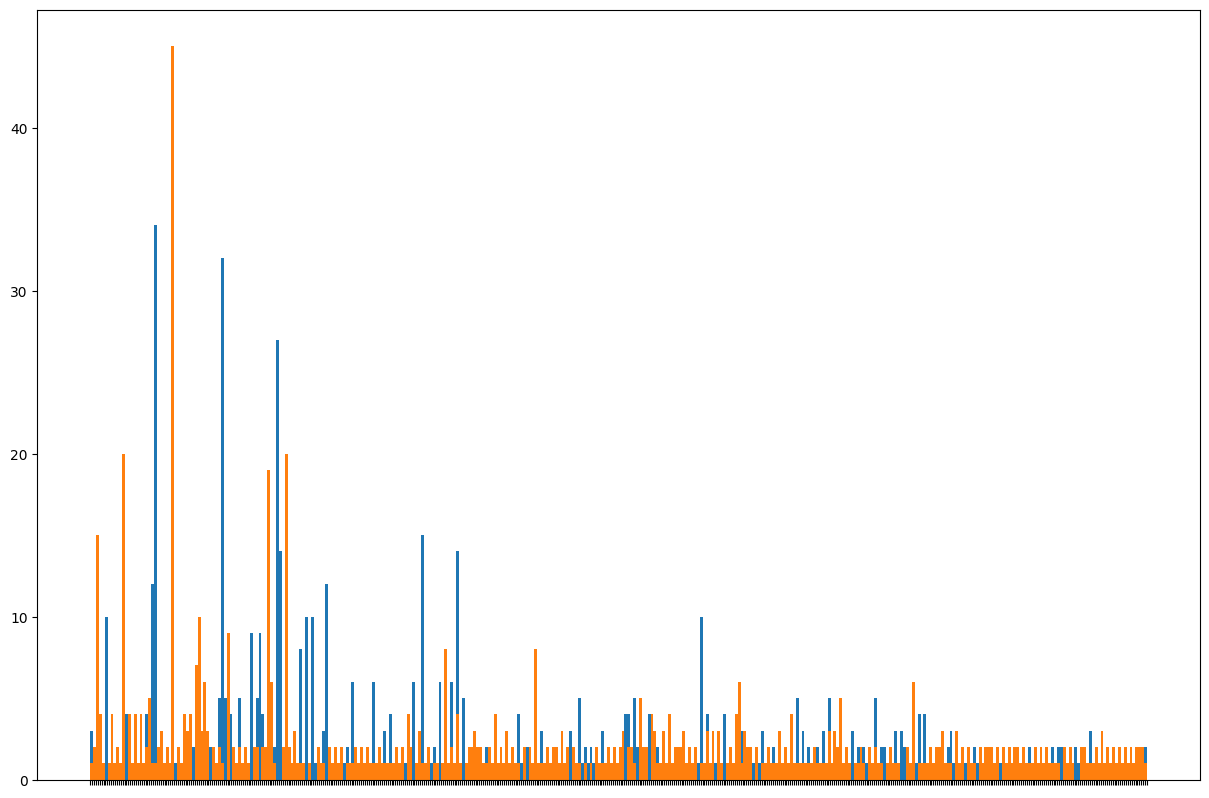

In [50]:
fig, ax = plt.subplots(figsize=(15,10))

ax.hist(nltk_tokens_2, bins=int(len(nltk_tokens_2)/3))
ax.hist(nltk_tokens_without_stopwords_custom, bins=int(len(nltk_tokens_2)/3))

# Remove the x-axis labels
ax.set_xticklabels([])

plt.show()

### SpaCy Word Frequency Plots

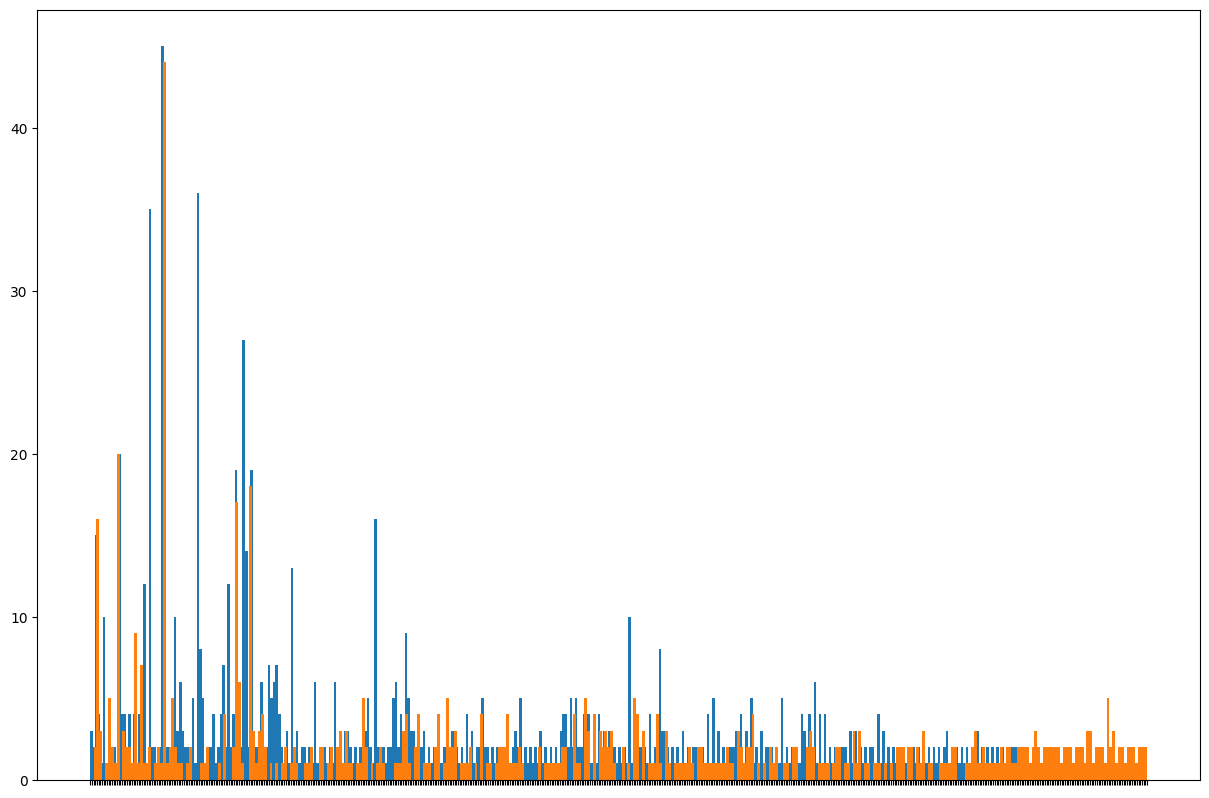

In [52]:
spacy_message = nlp((" ").join(messages_to_tokenize))
spacy_tokens = [token.text for token in spacy_message]

fig, ax = plt.subplots(figsize=(15,10))

ax.hist(spacy_tokens, bins=int(len(spacy_tokens)/3))
ax.hist(filtered_words_with_custom_spacy, bins=int(len(spacy_tokens)/3))

# Remove the x-axis labels
ax.set_xticklabels([])

plt.show()

In [53]:
# Check the change in vocabulary for NLTK
print('Before stop word removal:')
print(len(set(nltk_tokens_2)))

print('After stop word removal:')
print(len(set(nltk_tokens_without_stopwords)))

Before stop word removal:
555
After stop word removal:
444


In this case, removing stop words reduces the vocabulary size by 20% for the NLTK approach. Additionally, the token frequency distribution becomes more uniform, as seen in the overlayed histogram plots. Many of the moset frequent words in the original data set are stop words, as indicated by their frequency dropping to 0.

## Part 3: Text Normalization (30 points)


	1.	Task:
		Normalize the SMS messages by:
		•	Lowercasing all text
		•	Removing punctuation and numbers
		•	Replacing abbreviations (e.g., “u” → “you”, “r” → “are”): Apply both **Porter Stemming** and **WordNet Lemmatization** to your normalized text to compare root reduction techniques
		•	Implement a reusable normalization function that combines these steps

	2.	Deliverable (25 points):
	•	Python code for the normalization function
	•	Example output showing a side-by-side comparison of the raw text, the Stemmed output, and the Lemmatized output

	3.	Question (5 points):
	•	Identify at least two instances where the Porter Stemmer produced a "non-dictionary" stem while the WordNet Lemmatizer produced a valid base form. Explain why this occurs based on the difference between grapheme-based chopping and morphological analysis

In [67]:
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\water\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Normalization Without Stemming or Lemmatization (for part 4)

In [93]:
def normalize(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    
    # Convert to lower case and store as a list
    words=text.lower().split(" ")

    # Abbreviations to look for... Some of these were identified while slicing the normalized text 
    # to verify this function.
    abbreviations = {"u":"you",
                     "c":"see",
                     "n":"and",
                     "r":"are",
                     "k":"okay",
                     "v":"very",
                     "ur":"your",
                     "cuz":"because",
                     "wkly":"weekly",
                     "txt":"text",
                     "tkts":"tickets",
                     "comp":"competition"}
    
    # Loop through the words and replace the abbreviations with real words
    for i, word in enumerate(words):
        if word in abbreviations:
            words[i]=abbreviations[word]

    return (" ").join(words)

#### Normalization with Stemming

In [68]:
def normalize_with_stemming(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    
    # Convert to lower case and store as a list
    words=text.lower().split(" ")

    # Abbreviations to look for... Some of these were identified while slicing the normalized text 
    # to verify this function.
    abbreviations = {"u":"you",
                     "c":"see",
                     "n":"and",
                     "r":"are",
                     "k":"okay",
                     "v":"very",
                     "ur":"your",
                     "cuz":"because",
                     "wkly":"weekly",
                     "txt":"text",
                     "tkts":"tickets",
                     "comp":"competition"}
    
    # Instansiate the stemmer
    stemmer = PorterStemmer()

    # Loop through the words and replace the abbreviations with real words
    for i, word in enumerate(words):
        if word in abbreviations:
            words[i]=abbreviations[word]

        # Now that the abbreviation is handled, if required, stem the word 
        words[i]=stemmer.stem(words[i])

    return (" ").join(words)

In [81]:
normalized_text_stemmed = normalize_with_stemming((" ").join(messages_to_tokenize))

#### Normalization with Lemmatization

In [71]:
def normalize_with_lemmatization(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    
    # Convert to lower case and store as a list
    words=text.lower().split(" ")

    # Abbreviations to look for... Some of these were identified while slicing the normalized text 
    # to verify this function.
    abbreviations = {"u":"you",
                     "c":"see",
                     "n":"and",
                     "r":"are",
                     "k":"okay",
                     "v":"very",
                     "ur":"your",
                     "cuz":"because",
                     "wkly":"weekly",
                     "txt":"text",
                     "tkts":"tickets",
                     "comp":"competition"}
    
    # Instansiate the stemmer
    lem = WordNetLemmatizer()

    # Loop through the words and replace the abbreviations with real words
    for i, word in enumerate(words):
        if word in abbreviations:
            words[i]=abbreviations[word]

        # Now that the abbreviation is handled, if required, stem the word 
        words[i]=lem.lemmatize(words[i])

    return (" ").join(words)

In [82]:
original_text = (" ").join(messages_to_tokenize)

In [83]:
normalized_text_lemmed = normalize_with_lemmatization((" ").join(messages_to_tokenize))

#### Comparison

In [87]:
print("============Original Text============\n")
print(original_text[100:200])
print("\n============Stemmed Text============\n")
print(normalized_text_stemmed[100:200])
print("\n============Lemmatized Text============\n")
print(normalized_text_lemmed[100:200])

============Original Text============

more wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st 

============Stemmed Text============

k lar joke wif you oni free entri in  a weekli competit to win fa cup final ticket st may  text fa t

============Lemmatized Text============

 wat ok lar joking wif you oni free entry in  a weekly competition to win fa cup final ticket st may


Based on the text above, the porter stemmer technique produced non-dictionary words from "entry" and "weekly", reducing them to "entri" and "weekli", respectively. In both cases, lemmatization retained the words in their correct state. The stemming technique fails in these scenarios because it is a grapheme based algorithm that operates on specific letter combinations, regardless of the context. The English language is complex, and some words do not contain root words or derivatives of inflectional suffixes that are common, like weekly and entry. On the contrary, Lemmatization will reduce words to dictionary subversions based on context, which produces valid words. The trade-off in this the speed of the algorith. Lemmatization will be slower as a reqult of the dictionary lookup.

## Part 4: Combining All Preprocessing Steps (30 points)

	1.	Task:
		•	Combine tokenization, stop word removal, and normalization into a single preprocessing pipeline.
		•	Apply the pipeline to first 50 messages in the SMS Spam dataset
		•	Calculate and print the Vocabulary Size (the count of unique tokens) twice: once for the raw text and once after the full preprocessing pipeline is complete.
		•	Visualize the most frequent words after preprocessing using a bar chart

	2.	Deliverable (25 points):
		•	Python code for the preprocessing pipeline
		•	Printed output showing: "Initial Vocabulary Size"  vs. "Cleaned Vocabulary Size."
		•	A bar chart idplaying the top 10 most frequent words.

	3.	Question (5 points):
	•	Explain how the reduction in unique tokens (vocabulary size) impacts the computational overhead and the potential accuracy of a future classification model.

The preprocessing pipeline will be structured as follows:
1. Normalize
    - Normalization will occur first to lowercase the text and replace abbreviations. This will avoid tokens being mistaken for abbreviations, as tokens may not be whole words.
2. Stop Word Removal
    - Stop word removal is performed prior to tokenization because the preferred package is NLTK. This is precautionary, as NLTK appeared to tokenize into smaller subsets than other approaches. I want to ensure the stop words, which are full english words, are removed prior to tokenization, where they may be truncated.
3. Stem or Lemmatize
    - Stemming and lemmatization should occur on the cleaned dataset for all relevant words.
4. Tokenize
    - Tokenization occurs last on the cleaned dataset.

In [94]:
def preprocess_text(text, stem = False, lem = False):
    # Do not allow simultaneous lemmatization and stemming
    assert not (stem and lem)

    text_without_stopwords = " ".join([word for word in text.split(" ") if word not in nltk_stop_words])

    if stem:
        normalized_text = normalize_with_stemming(text_without_stopwords)
    elif lem:
        normalized_text = normalize_with_lemmatization(text_without_stopwords)
    else:
        normalized_text = normalize(text_without_stopwords)

    tokens = word_tokenize(normalized_text)
    return tokens
    

See how the output compares between each of the preprocessing options.

In [100]:
preprocessed_tokens = preprocess_text(" ".join(sms_data["message"].head(50).values))
preprocessed_tokens[125:135]

['are',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'the']

In [101]:
preprocessed_tokens_stemmed = preprocess_text(" ".join(sms_data["message"].head(50).values), stem=True)
preprocessed_tokens_stemmed[125:135]

['are',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'the']

In [102]:
preprocessed_tokens_lemmed = preprocess_text(" ".join(sms_data["message"].head(50).values), lem=True)
preprocessed_tokens_lemmed[125:135]

['are',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'the']

#### Print Vocabulary Sizes

In [104]:
print("============ Original Size ============\n")
print(len(set(" ".join(sms_data["message"].head(50).values).split(" "))))

print("\n============ Preprocessed without Stemming or Lemmatization ============\n")
print(len(set(preprocessed_tokens)))

print("\n============ Preprocessed with Stemming ============\n")
print(len(set(preprocessed_tokens_stemmed)))

print("\n============ Preprocessed with Lemmatization ============\n")
print(len(set(preprocessed_tokens_lemmed)))

============ Original Size ============

580

============ Preprocessed without Stemming or Lemmatization ============

405

============ Preprocessed with Stemming ============

380

============ Preprocessed with Lemmatization ============

394


As expected, the original vocabulary size is the largest, followed by preprocessing without stemming or lemmatization, then preprocessing with lemmatization, and lastly preprocessing with stemming. Preprocessing without stemming or lemmatization leaves more combinations of words that have the same meaning, but different suffixes, i.e. earlier, earliest, early. Lemmatization reduces these combinations to the base word, which would be early based on the previous example. Stemming can create non-dictionary words and reduce words with different meanings to the same root, which further reduces the unique output words.

#### Function to Find Common Tokens

In [ ]:
def find_common(tokens):
    token_frequency = {}
    for token in tokens:
        if token in token_frequency:
            token_frequency[token]+=1
        else:
            token_frequency[token]=1

    most_common_counts = sorted(token_frequency.values(), reverse=True)[0:10]
    common_tokens = []
    for tok, count in token_frequency.items():
        if count in most_common_counts:
            common_tokens.extend([tok]*count)
    
    return common_tokens

#### Create Histograms

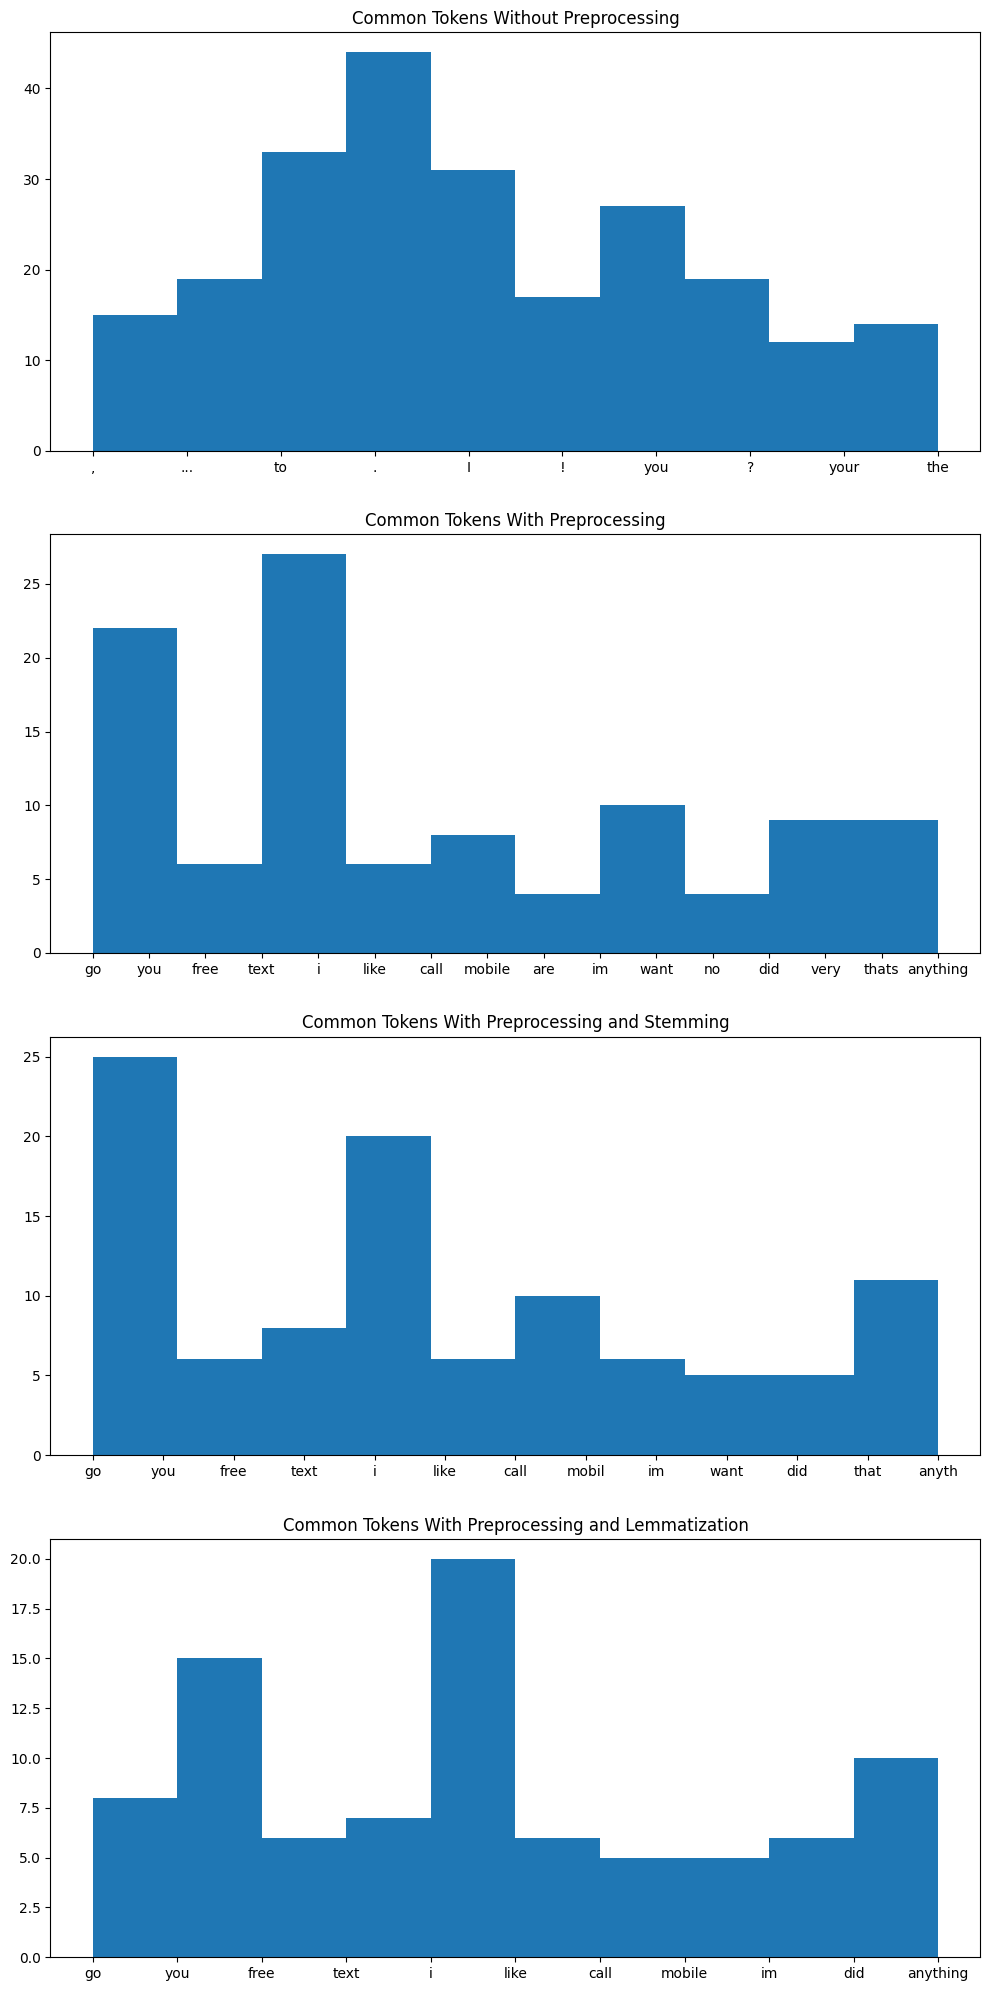

In [110]:
tokens_wo_preprocessing = word_tokenize(" ".join(sms_data["message"].head(50).values))

common_tokens_wo_preprocessing = find_common(tokens_wo_preprocessing)
common_tokens_preprocessed = find_common(preprocessed_tokens)
common_tokens_preprocessed_stemmed = find_common(preprocessed_tokens_stemmed)
common_tokens_preprocessed_lemmed = find_common(preprocessed_tokens_lemmed)

fig, ax = plt.subplots(nrows=4, figsize=(12,25))

ax[0].hist(common_tokens_wo_preprocessing)
ax[0].set_title("Common Tokens Without Preprocessing")
ax[1].hist(common_tokens_preprocessed)
ax[1].set_title("Common Tokens With Preprocessing")
ax[2].hist(common_tokens_preprocessed_stemmed)
ax[2].set_title("Common Tokens With Preprocessing and Stemming")
ax[3].hist(common_tokens_preprocessed_lemmed)
ax[3].set_title("Common Tokens With Preprocessing and Lemmatization")


plt.show()

Explain how the reduction in unique tokens (vocabulary size) impacts the computational overhead and the potential accuracy of a future classification model.

A reduction in vocabulary results in fewer unique combinations of words, reducing the dimensionality of the data and the linguistic complexity the model needs to learn. This will dramatically reduce the computational overhead, as the complexity of the data grows exponentially with its vocabulary size, but it may negatively impact accuracy. The model must be generalized to be effective with novel inputs, so reducing the vocabulary too aggressively may limit the model's ability to understand word combinations used in contexts outside of what was present in the training data.